Diffusion Posterior Sampling

gradient of log density (i.e. Stein score:$\nabla_x \log p(x)$)  
样本：$\{x_1,\cdots,x_n\}$，要得到概率分布$p_\theta(x)=\frac{e^{-f_\theta}(x)}{Z_\theta}$，目标是最大化$\sum\limits_{i=1}^NP_\theta(x_i)=\sum\limits_{i=1}^Nf_\theta(x)-log(Z_\theta)$，其中$Z_\theta$为归一化项，通常难以处理，由此引入score function:$\nabla_x\log p(x)=\nabla_xf_\theta(x)$  
用神经网络$s_\theta(x)$来拟合$\nabla_x\log p(x)$,目标最小化$\Vert\nabla_xp(x)-s_\theta(x)\Vert$  
朗之万动力学采样：$x_{i+1}=x_i+\epsilon\nabla_x\log p(x)+\sqrt{2\epsilon}z_i,i\sim N(0,I)$  
初始$x_0$随机，K足够大，x收敛到p(x)一个样本  

正向SDE(加噪)：$dx=f(x,t)dt+g(t)dw$  
反向SDE(去噪)：$dx=(f(x,t)-g(t)^2\nabla_x\log p_t(x))dt+g(t)dw$  
在diffusion model中，我们有$x_i=\sqrt{1-\beta_i}x_{i-1}+\sqrt{\beta_i}z_{i-1}，i=1,2,\cdots,N$，当$N\rightarrow\infty$，该方程可化为SDE：$dx=-\frac{1}{2}\beta(t)xdt+\sqrt{\beta(t)}dw$，对应的反向SDE为$dx=[-\frac{1}{2}\beta(t)-\beta(t)\nabla_x\log p_t(x)]xdt+\sqrt{\beta(t)}dw$  
在已知图片y的分布下，上述反向SDE可转化为  
\begin{equation}
\begin{align*}
dx&=[-\frac{1}{2}\beta(t)-\beta(t)\nabla_x\log p_t(x_t|y)]xdt+\sqrt{\beta(t)}dw\\&=[-\frac{1}{2}\beta(t)-\beta(t)(\nabla_{x_t}\log p_t(x_t)+\nabla_{x_t}\log p_t(y|x_t))]xdt+\sqrt{\beta(t)}dw
\end{align*}
\end{equation}
y定义为$y=A(x_0)+n,y,n\in\R^d,n\sim N(0,\sigma^2I)$，也即$p(y|x_0)\sim N(y|A(x_0),\sigma^2I)$

从diffusion model中，我们已经有$x_t=\sqrt{\bar\alpha_t}x_0+\sqrt{1-\bar\alpha_t}z,z\sim N(0,I)$，由此我们可以得到条件均值
$$
\hat{x}_0:=E[x_0|x_t]=\frac{1}{\sqrt{\alpha(t)}}(x_t+(1-\bar\alpha(t))\nabla_{x_t}\log p_t(x_t))
$$
而$\nabla_{x_t}\log p_t(x_t)$可以用神经网络$s_\theta$近似，所以得到
$$
\hat{x}_0\backsimeq \frac{1}{\sqrt{\alpha(t)}}(x_t+(1-\bar\alpha(t))s_\theta(x_t,t))
$$
另外，我们有公式
$$
p(y|x_t)=\int p(y|x_0,x_t)p(x_0|x_t)dx_0=\int p(y|x_0)p(x_0|x_t)dx_0
$$
也即有
$$
p(y|x_t)=E_{x_0\sim p(x_0|x_l)}[p(y|x_0)]
$$
由此我们有近似：$p(y|x_t)\backsimeq p(y|\hat{x}_0)$，其中$\hat{x}_0=E[x_0|x_t]$，误差为$J=E[f(x)]-f[E(x)]\le\frac{d}{\sqrt{2\pi\sigma^2}}e^{1/2\sigma^2}\Vert\nabla_xA(x)\Vert m_1$，其中$\Vert\nabla_xA(x)\Vert:=\max_x\Vert\nabla_xA(x)\Vert,m_1=\int\Vert x_0-\hat{x}_0\Vert p(x_0|x_t)dx_0$  
通过这个近似，我们有$\nabla_{x_t}\log p_t(y|x_t)\backsimeq \nabla_{x_t}\log p_t(y|\hat{x_0})$

Gaussian noise  
似然函数为$$p(y|x_0)=\frac{1}{\sqrt{(2\pi)^n\sigma^{2n}}}exp[-\frac{\Vert y-A(x_0)\Vert_2^2}{2\sigma^2}]$$且有导数近似$$\nabla_{x_t}p(y|x_t)\backsimeq-\nabla_{x_t} \frac{\Vert y-A(x_0)\Vert_2^2}{2\sigma^2}$$结合贝叶斯公式,我们有$$\nabla_{x_t}p(x_t|y)\backsimeq s_{\theta^*}(x_t,t)-\rho\nabla_{x_t}\Vert y-A(x_0)\Vert_2^2,\rho=\frac{1}{2\sigma^2}$$

Possion noise  
似然函数为
$$p(y|x_0)=\prod\limits_{j=1}^n\frac{[A(x_0)]_j^{y_j}exp[ [-A(x_0)]_j]}{y_j!}$$
由中心极限定理可近似为
\begin{equation}
\begin{align}
p(y|x_0)&=\prod\limits_{j=1}^n\frac{1}{\sqrt{(2\pi)[A(x_0)]_j}}exp(-\frac{(y_j-A(x_0)_j)^2}{2A(x_0)_j})\\
&=\prod\limits_{j=1}^n\frac{1}{\sqrt{(2\pi)y_j}}exp(-\frac{(y_j-A(x_0)_j)^2}{2y_j})
\end{align}
\end{equation}
所以有导数近似
$$\nabla_{x_t}p(y|x_t)\backsimeq-\nabla_{x_t}\Vert y-A(x_0)\Vert_\Lambda^2$$
结合贝叶斯公式，我们有
$$\nabla_{x_t}p(x_t|y)\backsimeq s_{\theta^*}(x_t,t)-\rho\nabla_{x_t}\Vert y-A(x_0)\Vert_\Lambda^2,\rho=\frac{1}{2\sigma^2}$$

导出的算法如下
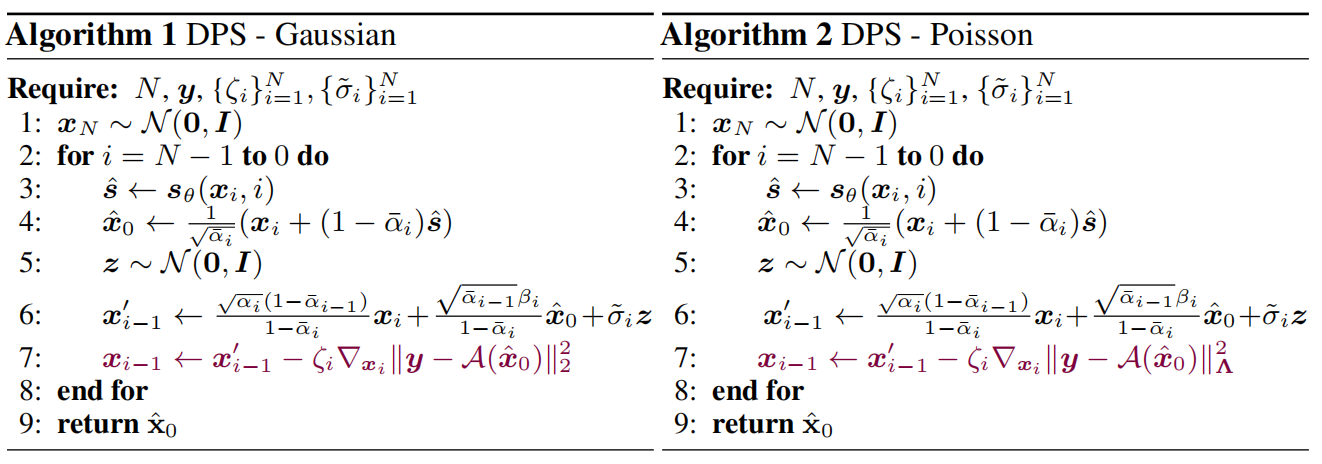